In this notebook you'll find an overview of available learning rate schedulers and an example of how they change the learning rate.

Contents:
1. Cosine Annealing
2. Cosine Annealing Warm Restarts
3. Cyclic
4. Exponential
5. Lambda ("poly")
6. Multiplicative
7. Polynomial
8. Step

In [13]:
import torch
import matplotlib.pyplot as plt
import numpy as np

class Parameter(torch.nn.Module):
    def __init__(self):
        super(Parameter, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 2,2)

    def forward(self, x):
       return self.conv1(x)

def test_lr_scheduler(scheduler, optimizer, ax, title, epochs=1000):
    lrs = []
    maxe = epochs
    current = 0
    while current < maxe:
        optimizer.zero_grad()
        lrs.append(scheduler.get_last_lr())
        optimizer.step()
        scheduler.step()
        current += 1

    ax.plot(range(len(lrs)), lrs)
    ax.set_yticks(np.linspace(0, 0.125, 11))
    ax.set_title(title)



<a id=ca></a>
### Cosine Annealing

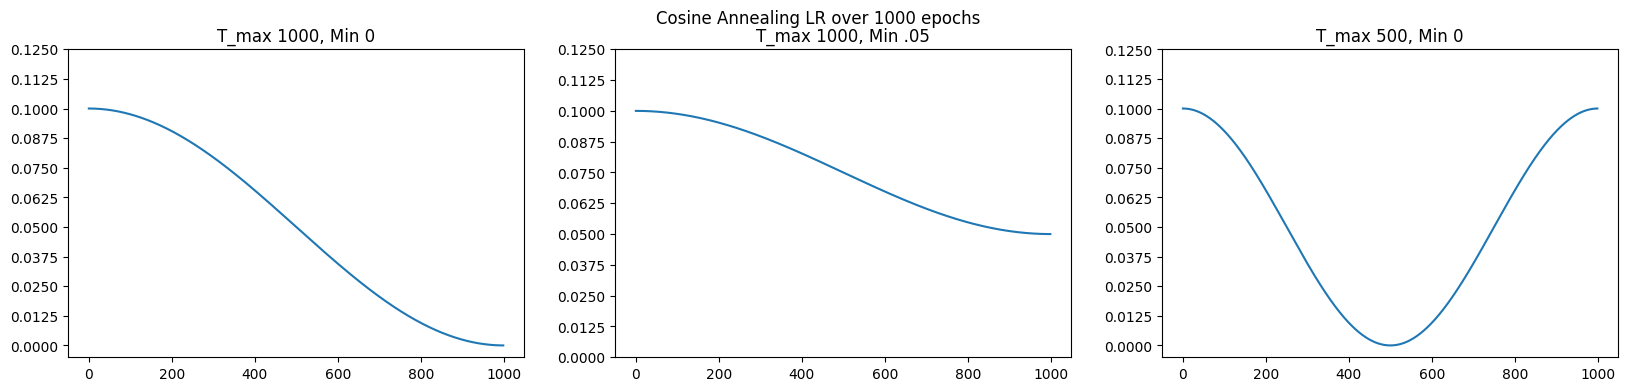

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(20,4))
fig.suptitle('Cosine Annealing LR over 1000 epochs')
learning_rate = 0.1
model = Parameter()
opt1 = torch.optim.SGD(model.parameters(), lr=learning_rate)
opt2 = torch.optim.SGD(model.parameters(), lr=learning_rate)
opt3 = torch.optim.SGD(model.parameters(), lr=learning_rate)

lr_s1 = torch.optim.lr_scheduler.CosineAnnealingLR(opt1, T_max = 1000)
lr_s2 = torch.optim.lr_scheduler.CosineAnnealingLR(opt2, T_max = 1000, eta_min = 0.05)
lr_s3 = torch.optim.lr_scheduler.CosineAnnealingLR(opt3, T_max = 500, eta_min = 0)

test_lr_scheduler(lr_s1, opt1, ax=ax[0], title='T_max 1000, Min 0')
test_lr_scheduler(lr_s2, opt2, ax=ax[1], title='T_max 1000, Min .05')
test_lr_scheduler(lr_s3, opt3, ax=ax[2], title='T_max 500, Min 0')


### Cosine Annealing Warm Restarts

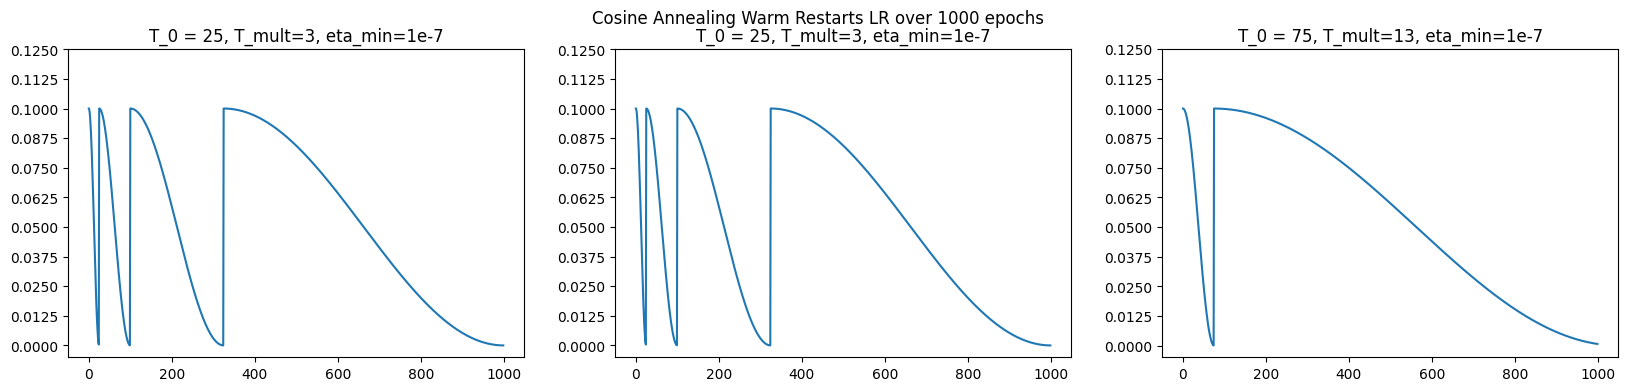

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(20,4))
fig.suptitle('Cosine Annealing Warm Restarts LR over 1000 epochs')
learning_rate = 0.1
model = Parameter()
opt1 = torch.optim.SGD(model.parameters(), lr=learning_rate)
opt2 = torch.optim.SGD(model.parameters(), lr=learning_rate)
opt3 = torch.optim.SGD(model.parameters(), lr=learning_rate)

lr_s1 = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(opt1, T_0 = 25, T_mult=3, eta_min=1e-7)
lr_s2 = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(opt1, T_0 = 25, T_mult=3, eta_min=1e-7)
lr_s3 = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(opt3, T_0 = 75, T_mult=13, eta_min=1e-7)

test_lr_scheduler(lr_s1, opt1, ax=ax[0], title='T_0 = 25, T_mult=3, eta_min=1e-7')
test_lr_scheduler(lr_s2, opt2, ax=ax[1], title='T_0 = 25, T_mult=3, eta_min=1e-7')
test_lr_scheduler(lr_s3, opt3, ax=ax[2], title='T_0 = 75, T_mult=13, eta_min=1e-7')


### Cyclic

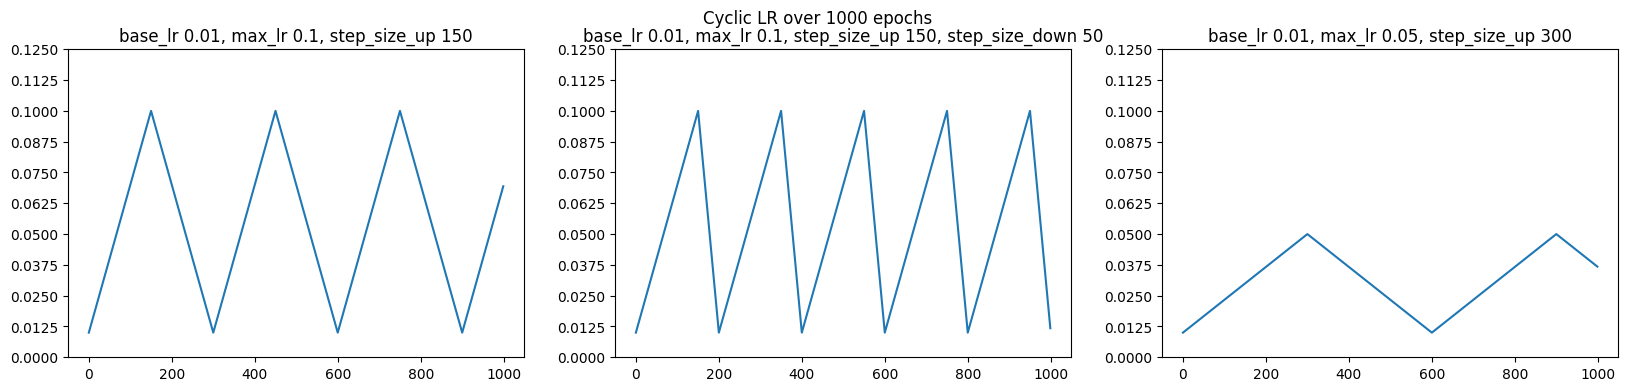

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(20,4))
fig.suptitle('Cyclic LR over 1000 epochs')
learning_rate = 0.1
model = Parameter()
opt1 = torch.optim.SGD(model.parameters(), lr=learning_rate)
opt2 = torch.optim.SGD(model.parameters(), lr=learning_rate)
opt3 = torch.optim.SGD(model.parameters(), lr=learning_rate)

lr_s1 = torch.optim.lr_scheduler.CyclicLR(opt1,  base_lr=0.01, max_lr=0.1, step_size_up=150)
lr_s2 = torch.optim.lr_scheduler.CyclicLR(opt2,  base_lr=0.01, max_lr=0.1, step_size_up=150, step_size_down=50)
lr_s3 = torch.optim.lr_scheduler.CyclicLR(opt3,  base_lr=0.01, max_lr=0.05, step_size_up=300)

test_lr_scheduler(lr_s1, opt1, ax=ax[0], title='base_lr 0.01, max_lr 0.1, step_size_up 150')
test_lr_scheduler(lr_s2, opt2, ax=ax[1], title='base_lr 0.01, max_lr 0.1, step_size_up 150, step_size_down 50')
test_lr_scheduler(lr_s3, opt3, ax=ax[2], title='base_lr 0.01, max_lr 0.05, step_size_up 300')

### Exponential

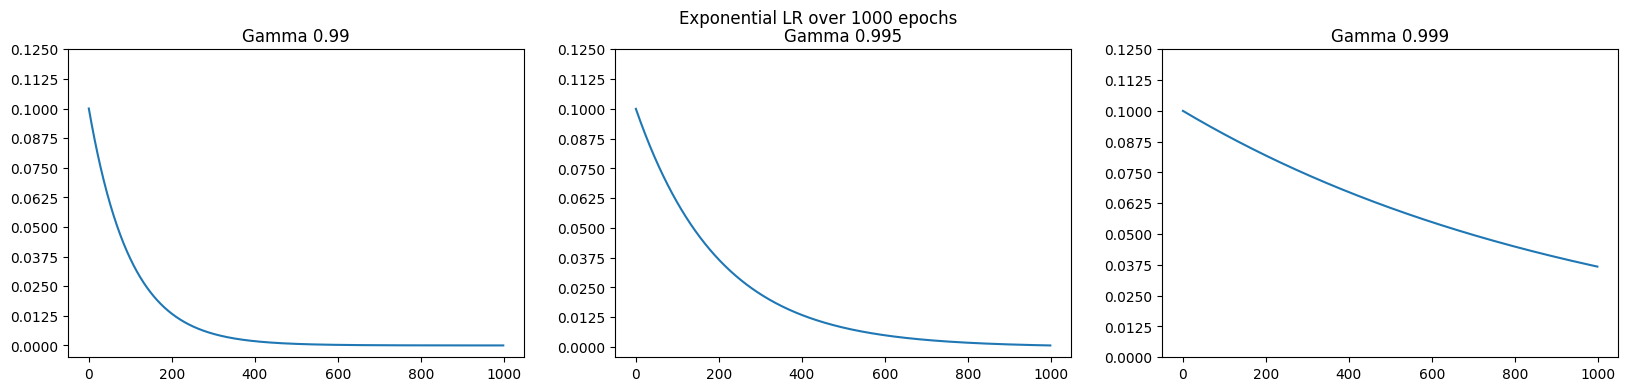

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(20,4))
fig.suptitle('Exponential LR over 1000 epochs')
learning_rate = 0.1
model = Parameter()
opt1 = torch.optim.SGD(model.parameters(), lr=learning_rate)
opt2 = torch.optim.SGD(model.parameters(), lr=learning_rate)
opt3 = torch.optim.SGD(model.parameters(), lr=learning_rate)

lr_s1 = torch.optim.lr_scheduler.ExponentialLR(opt1, gamma=0.99, last_epoch=-1, verbose=False)
lr_s2 = torch.optim.lr_scheduler.ExponentialLR(opt2, gamma=0.995, last_epoch=-1, verbose=False)
lr_s3 = torch.optim.lr_scheduler.ExponentialLR(opt3, gamma=0.999, last_epoch=-1, verbose=False)

test_lr_scheduler(lr_s1, opt1, ax=ax[0], title='Gamma 0.99')
test_lr_scheduler(lr_s2, opt2, ax=ax[1], title='Gamma 0.995')
test_lr_scheduler(lr_s3, opt3, ax=ax[2], title='Gamma 0.999')

### Lambda ("poly")

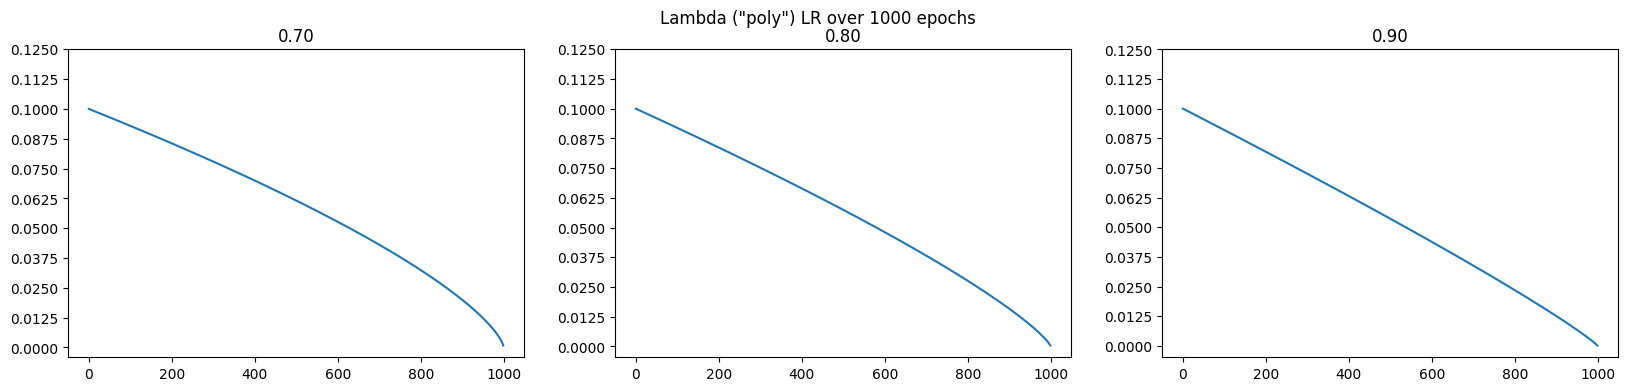

In [18]:
#From https://cardiacmr.hms.harvard.edu/files/cardiacmr/files/isensee_etal_nature2021_nnunet.pdf
#Whici is from: https://cardiacmr.hms.harvard.edu/files/cardiacmr/files/isensee_etal_nature2021_nnunet.pdf
#Which is from: https://arxiv.org/pdf/1506.04579.pdf

fig, ax = plt.subplots(1, 3, figsize=(20,4))
fig.suptitle('Lambda ("poly") LR over 1000 epochs')
learning_rate = 0.1
model = Parameter()
opt1 = torch.optim.SGD(model.parameters(), lr=learning_rate)
opt2 = torch.optim.SGD(model.parameters(), lr=learning_rate)
opt3 = torch.optim.SGD(model.parameters(), lr=learning_rate)

lr_s1 = torch.optim.lr_scheduler.LambdaLR(opt1,  lr_lambda=lambda epoch: (1 - epoch / 1000)**0.70)
lr_s2 = torch.optim.lr_scheduler.LambdaLR(opt2,  lr_lambda=lambda epoch: (1 - epoch / 1000)**0.80)
lr_s3 = torch.optim.lr_scheduler.LambdaLR(opt3,  lr_lambda=lambda epoch: (1 - epoch / 1000)**0.90)

test_lr_scheduler(lr_s1, opt1, ax=ax[0], title='0.70')
test_lr_scheduler(lr_s2, opt2, ax=ax[1], title='0.80')
test_lr_scheduler(lr_s3, opt3, ax=ax[2], title='0.90')

### Multiplicative

KeyboardInterrupt: 

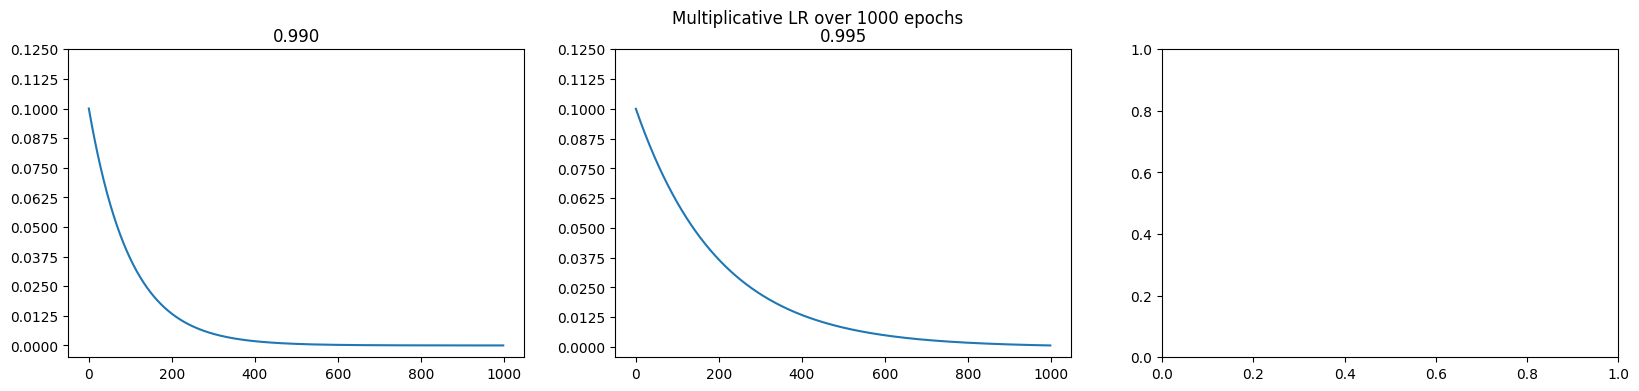

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(20,4))
fig.suptitle('Multiplicative LR over 1000 epochs')
learning_rate = 0.1
model = Parameter()
opt1 = torch.optim.SGD(model.parameters(), lr=learning_rate)
opt2 = torch.optim.SGD(model.parameters(), lr=learning_rate)
opt3 = torch.optim.SGD(model.parameters(), lr=learning_rate)

lr_s1 = torch.optim.lr_scheduler.MultiplicativeLR(opt1,  lr_lambda=lambda epoch: 0.990)
lr_s2 = torch.optim.lr_scheduler.MultiplicativeLR(opt2,  lr_lambda=lambda epoch: 0.995)
lr_s3 = torch.optim.lr_scheduler.MultiplicativeLR(opt3,  lr_lambda=lambda epoch: 0.999)

test_lr_scheduler(lr_s1, opt1, ax=ax[0], title='0.990')
test_lr_scheduler(lr_s2, opt2, ax=ax[1], title='0.995')
test_lr_scheduler(lr_s3, opt3, ax=ax[2], title='0.999')


### Polynomial

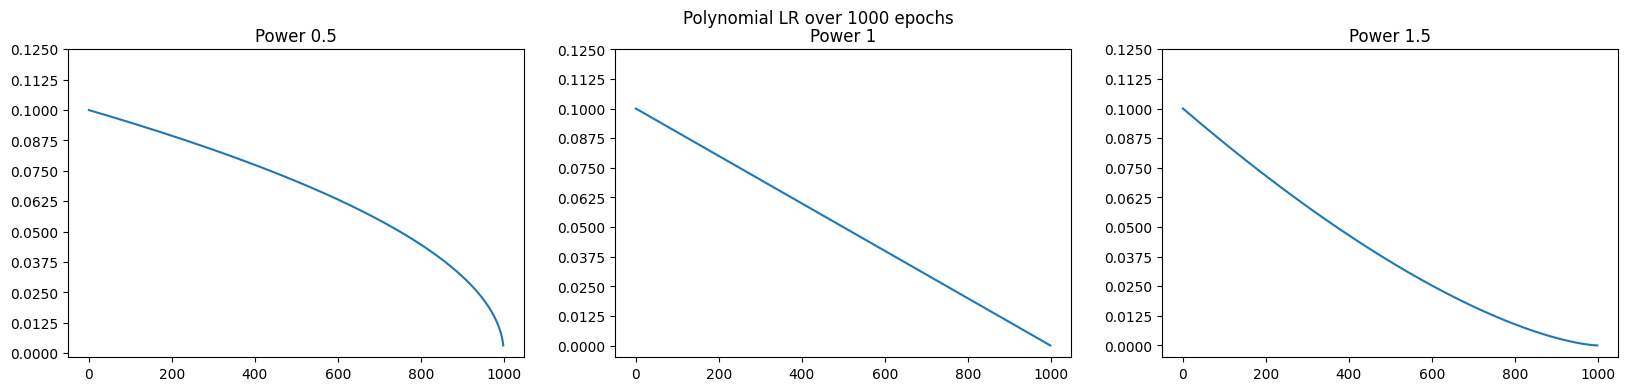

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20,4))
fig.suptitle('Polynomial LR over 1000 epochs')
learning_rate = 0.1
model = Parameter()
opt1 = torch.optim.SGD(model.parameters(), lr=learning_rate)
opt2 = torch.optim.SGD(model.parameters(), lr=learning_rate)
opt3 = torch.optim.SGD(model.parameters(), lr=learning_rate)

lr_s1 = torch.optim.lr_scheduler.PolynomialLR(opt1, total_iters=1000, power=0.5)
lr_s2 = torch.optim.lr_scheduler.PolynomialLR(opt2, total_iters=1000, power=1)
lr_s3 = torch.optim.lr_scheduler.PolynomialLR(opt3, total_iters=1000, power=1.5)

test_lr_scheduler(lr_s1, opt1, ax=ax[0], title='Power 0.5')
test_lr_scheduler(lr_s2, opt2, ax=ax[1], title='Power 1')
test_lr_scheduler(lr_s3, opt3, ax=ax[2], title='Power 1.5')


### Step

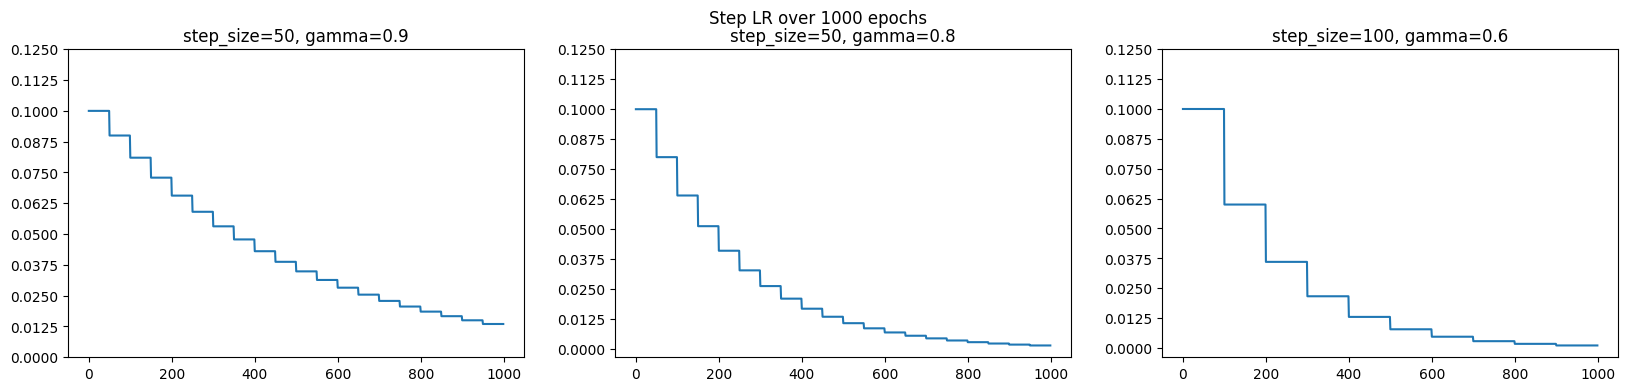

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20,4))
fig.suptitle('Step LR over 1000 epochs')
learning_rate = 0.1
model = Parameter()
opt1 = torch.optim.SGD(model.parameters(), lr=learning_rate)
opt2 = torch.optim.SGD(model.parameters(), lr=learning_rate)
opt3 = torch.optim.SGD(model.parameters(), lr=learning_rate)

lr_s1 = torch.optim.lr_scheduler.StepLR(opt1, step_size=50, gamma=0.9)
lr_s2 = torch.optim.lr_scheduler.StepLR(opt2, step_size=50, gamma=0.8)
lr_s3 = torch.optim.lr_scheduler.StepLR(opt3, step_size=100, gamma=0.6)

test_lr_scheduler(lr_s1, opt1, ax=ax[0], title='step_size=50, gamma=0.9')
test_lr_scheduler(lr_s2, opt2, ax=ax[1], title='step_size=50, gamma=0.8')
test_lr_scheduler(lr_s3, opt3, ax=ax[2], title='step_size=100, gamma=0.6')


# Layerwise learning rate


In [5]:
from torch.optim import SGD
from torch.optim.lr_scheduler import CosineAnnealingLR
import matplotlib.pyplot as plt

def plot_parameter_group_lrs(parameter_groups, base_lr, steps = 1000):
    opt = SGD(parameter_groups, lr=base_lr)
    sch = CosineAnnealingLR(opt, T_max = steps)

    state_dict = opt.state_dict()
    n = len(state_dict['param_groups'])
    lrs = [[] for i in range(n)]

    current = 0
    while current < steps:
        opt.zero_grad()

        # store lrs for plotting
        last_lrs = sch.get_last_lr()
        for i in range(n):
            lrs[i].append(last_lrs[i])

        opt.step()
        sch.step()
        current += 1

    # plot
    fig, ax = plt.subplots(1, 1, figsize=(20,4))
    fig.suptitle(f'Cosine Annealing LR over {steps} steps per Paramater Group')

    for i in range(n):
        ax.plot(range(steps), lrs[i])

    ax.set_ylim([0, base_lr+base_lr/10])

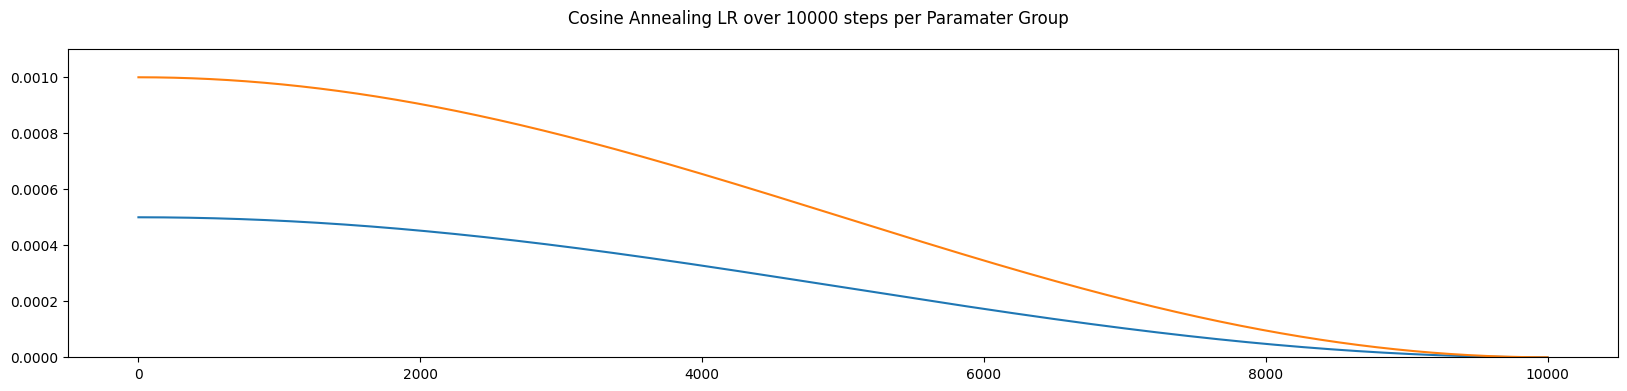

In [3]:
import torch.nn as nn

class TinyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
        return self.conv1(self.conv2(x))

model = TinyModel()
learning_rate = 0.001

parameters = [{ 'params': model.conv1.parameters(), 'lr': learning_rate * 0.5 }, {'params': model.conv2.parameters(), 'lr': learning_rate }]

plot_parameter_group_lrs(parameters, learning_rate, steps = 10000)



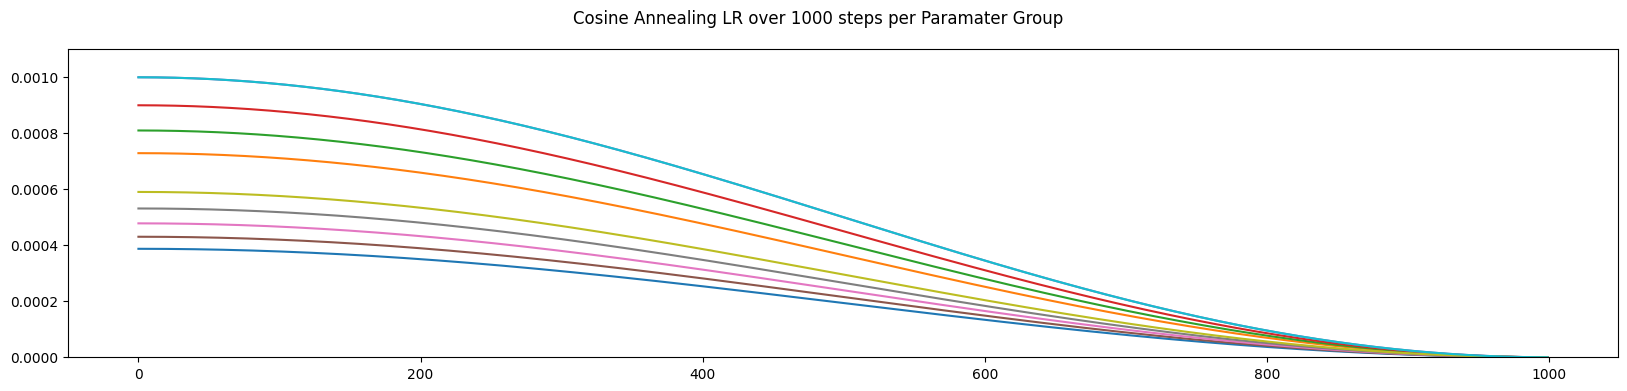

In [6]:
from numpy import NaN
from pytest import param
from sympy import sec
from yucca.network_architectures.networks.UNet import UNet

unet = UNet(1)

lr_decay = 0.9
lr = 1e-3

parameter_groups = unet.get_parameter_groups(base_lr=lr, lr_scale=lr_decay)

plot_parameter_group_lrs(parameter_groups, base_lr=lr)